# Getting to know your data

## Data Cleaning Checklist

1. Deal with column names
2. Deal with text columns
3. Deal with numeric columns
4. Deal with dates
5. Look at relationships between columns

## Data Cleaning Step 1 - Dealing with column names

#### Necessary Steps

* Carefully inspect the names 
* Strip whitespace
* Replace spaces with `_`
* Remove other offending characters
    * Punctuation
    * Latin symbols like å
* Make sure column names are unique
* Inspect the column type.  Anything unexpected?
* **Advanced** Is there measurement data in the labels?  If so, you need to reshape

#### Optional Steps

* Make all lowercase 
* Add prefix 
    * if combining with another table 
* Look for other ways to make them meaningful but short

## Data Cleaning Step 2 - Dealing with a numeric column

#### Necessary steps

* Inspect numeric summaries.  Do they make sense?
* Plot a histogram.  Anything unusual?
* Look at the min/max values.  Are they reasonable?
* Think about practical bounds
    * 0 <= percent <= 100
    * 0 <= fraction <= 1
    * Height > 0
* How are missing values represented?  Is if consistent?
    * Watch out for `0` in place of missing.
    

#### Optional steps

* Apply a log/sqrt transform to skewed data
* Remove outliers?
* Impute missing values?

## Data Cleaning Step 3 - Dealing with a text column

#### Necessary steps

* Inspect a list of unique labels and their counts
    * Look at the most common and fix common errors
    * Look at the least common, odd cases hide here
* Plot the frequency distribution.  Anything unusual?
* How are missing data represented?  Is it consistent?
    * Switch to `np.NaN` (Pandas), `None` (pure Python), `null` (Spark SQL)
* Look for and fix similarities in the labels
    * i.e. "Todd" vs. "todd"

#### Optional steps

* Consider switching to lowercase
* Consider adding a `"Other"` category for rare labels
* Consider recoding into broader categories

## Data Cleaning Step 4 - Dealing with a date column

#### Necessary steps

* Is the formating consistent?
* Correct conversion?
    * Two digit year?  How is this converted?
* Make columns for various date-parts
    * year
    * month
    * day
    * etc.
* Make plots of the date-parts and look for unusual values

## Data Cleaning Step 5 - Inspect relationship between columns

#### Necessary steps

* Compute cross-tabulated summary methods
    * **Text + Numeric** Group-by mean/median/SD/IQR
    * **Text + Text** Group-by counts/percents
* Plot the relationship
    * **Text + Numeric** side-by-side box plot
    * **Text + Text** mosiac plot
    * **Numeric + Numeric** scatter plot
* Look for unusual values.
    * i.e. `0` as missing often shows up in scatterplots

## Basic inspection tools

* `df.head()`        first five rows
* `df.tail()`        last five rows
* `df.sample(5)`     random sample of rows
* `df.shape`         number of rows/columns in a tuple
* `df.describe()`    calculates measures of central tendency
* `df.info()`

## <font color="red"> Exercise 1: Load and inspect the artwork from MoMA </font>

Make sure you can load both the csv and json files

[Data source](https://github.com/MuseumofModernArt/collection)

In [3]:
import pandas as pd
from dfply import *
artwork = pd.read_csv("./data/Artworks.csv")
artwork.head()

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,...,ThumbnailURL,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.)
0,"Ferdinandsbrücke Project, Vienna, Austria, Ele...",Otto Wagner,6210,"(Austrian, 1841–1918)",(Austrian),(1841),(1918),(Male),1896,Ink and cut-and-pasted painted pages on paper,...,http://www.moma.org/media/W1siZiIsIjU5NDA1Il0s...,NaN,NaN,NaN,48.6000,NaN,NaN,168.9000,NaN,NaN
1,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,7470,"(French, born 1944)",(French),(1944),(0),(Male),1987,Paint and colored pencil on print,...,http://www.moma.org/media/W1siZiIsIjk3Il0sWyJw...,NaN,NaN,NaN,40.6401,NaN,NaN,29.8451,NaN,NaN
2,"Villa near Vienna Project, Outside Vienna, Aus...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(Male),1903,"Graphite, pen, color pencil, ink, and gouache ...",...,http://www.moma.org/media/W1siZiIsIjk4Il0sWyJw...,NaN,NaN,NaN,34.3000,NaN,NaN,31.8000,NaN,NaN
3,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",(),(1944),(0),(Male),1980,Photographic reproduction with colored synthet...,...,http://www.moma.org/media/W1siZiIsIjEyNCJdLFsi...,NaN,NaN,NaN,50.8000,NaN,NaN,50.8000,NaN,NaN
4,"Villa, project, outside Vienna, Austria, Exter...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(Male),1903,"Graphite, color pencil, ink, and gouache on tr...",...,http://www.moma.org/media/W1siZiIsIjEyNiJdLFsi...,NaN,NaN,NaN,38.4000,NaN,NaN,19.1000,NaN,NaN


In [4]:
artwork.tail()

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,...,ThumbnailURL,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.)
136526,Duplicate of plate facing page 6 from Mazas,Maximilien Luce,3621,"(French, 1858–1941)",(French),(1858),(1941),(Male),1894,Lithograph from the supplementary suite of an ...,...,NaN,NaN,NaN,NaN,32.3,NaN,NaN,23.5,NaN,NaN
136527,Duplicate of plate facing page 7 from Mazas,Maximilien Luce,3621,"(French, 1858–1941)",(French),(1858),(1941),(Male),1894,Lithograph from the supplementary suite of an ...,...,NaN,NaN,NaN,NaN,30.4,NaN,NaN,24.0,NaN,NaN
136528,Duplicate of plate facing page 8 from Mazas,Maximilien Luce,3621,"(French, 1858–1941)",(French),(1858),(1941),(Male),1894,Lithograph from the supplementary suite of an ...,...,NaN,NaN,NaN,NaN,33.0,NaN,NaN,24.2,NaN,NaN
136529,Duplicate of plate facing page 9 from Mazas,Maximilien Luce,3621,"(French, 1858–1941)",(French),(1858),(1941),(Male),1894,Lithograph from the supplementary suite of an ...,...,NaN,NaN,NaN,NaN,32.0,NaN,NaN,24.0,NaN,NaN
136530,Duplicate of plate facing page 10 from Mazas,Maximilien Luce,3621,"(French, 1858–1941)",(French),(1858),(1941),(Male),1894,Lithograph from the supplementary suite of an ...,...,NaN,NaN,NaN,NaN,22.0,NaN,NaN,30.6,NaN,NaN


In [5]:
artwork.shape

(136531, 29)

In [6]:
artwork.describe()

,ObjectID,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.)
count,136531.000000,10.000000,13157.000000,1429.000000,117187.000000,738.000000,289.000000,116280.000000,0.0,3.304000e+03
mean,90576.707253,44.868020,16.789801,23.184666,37.642548,89.892356,1287.944097,38.072156,NaN,7.766900e+03
std,68230.367311,28.631604,55.337322,45.070383,47.700061,330.290367,12038.129595,66.482430,NaN,1.145070e+05
min,2.000000,9.900000,0.000000,0.635000,0.000000,0.000000,0.090000,0.000000,NaN,0.000000e+00
25%,36117.500000,23.500000,0.000000,7.900000,18.100000,17.100000,5.670000,17.780036,NaN,2.380000e+02
50%,72981.000000,36.000000,0.500000,13.800000,27.940056,26.700000,19.958300,25.400051,NaN,7.800000e+02
75%,137842.500000,71.125000,10.200000,24.900000,44.300000,79.700000,80.286700,44.600000,NaN,4.320000e+03
max,294767.000000,83.800000,1808.483617,914.400000,9140.000000,8321.056600,185067.585957,9144.000000,NaN,6.283065e+06


In [7]:
artwork.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136531 entries, 0 to 136530
Data columns (total 29 columns):
Title                 136492 non-null object
Artist                135083 non-null object
ConstituentID         135083 non-null object
ArtistBio             131085 non-null object
Nationality           135083 non-null object
BeginDate             135083 non-null object
EndDate               135083 non-null object
Gender                135083 non-null object
Date                  134128 non-null object
Medium                125364 non-null object
Dimensions            125536 non-null object
CreditLine            133653 non-null object
AccessionNumber       136531 non-null object
Classification        136531 non-null object
Department            136531 non-null object
DateAcquired          129775 non-null object
Cataloged             136531 non-null object
ObjectID              136531 non-null int64
URL                   78575 non-null object
ThumbnailURL          67825 non-null

## Inpecting columns

* First step in understanding data
* Look for problems with
    * the *column names*
    * column types
    * column statistics
    * column plots


## Data Cleaning Checklist

1. Deal with column names
2. Deal with text columns
3. Deal with numeric columns
4. Deal with dates
5. Look at relationships between columns

## Data Cleaning Step 1 - Dealing with column names

#### Necessary Steps

* Carefully inspect the names 
* Strip whitespace
* Replace spaces with `_`
* Remove other offending characters
    * Punctuation
    * Latin symbols like å
* Make sure column names are unique
* Inspect the column type.  Anything unexpected?
* **Advanced** Is there measurement data in the labels?  If so, you need to reshape

#### Optional Steps

* Make all lowercase 
* Add prefix 
    * if combining with another table 
* Look for other ways to make them meaningful but short

## Inspecting column names  - Pandas

Use the `df.columns` attribute

In [6]:
artists.columns

Index(['ConstituentID', 'DisplayName', 'ArtistBio', 'Nationality', 'Gender',
       'BeginDate', 'EndDate', 'Wiki QID', 'ULAN'],
      dtype='object')

## <font color="red"> Exercise 2: Run through the checklist. </font>

What are the issues that need to be fixed in the `artist` header?

*Your thoughts here*

## <font color="red"> Exercise 3 </font>

Apply the checklist to the `artwork` data frame.  What issues need to be fixed?

*Your thoughts here*

## Accessing columns with improper names

Note the column `'Wiki QID'`.

* Not a proper Python name
* No attribute
* Access with `artists['Wiki QID']`

In [ ]:
artists.Wiki# <-- Try tab ... doesn't work ... no attribute

In [21]:
artists['Wiki QID'].head()

0        None
1        None
2        None
3    Q1063584
4        None
Name: Wiki QID, dtype: object

## Fixing column names

Most Python string methods are available in `df.columns.str`

In [7]:
artists.columns.str.replace(' ', '_')

Index(['ConstituentID', 'DisplayName', 'ArtistBio', 'Nationality', 'Gender',
       'BeginDate', 'EndDate', 'Wiki_QID', 'ULAN'],
      dtype='object')

In [8]:
artists.columns = artists.columns.str.replace(' ', '_')
artists.Wiki_QID.head()

0         NaN
1         NaN
2         NaN
3    Q1063584
4         NaN
Name: Wiki_QID, dtype: object

## Renaming columns, a functional approach

* Using assignment can break our flow.
* Mutation makes reasoning about programs hard.
* In practice, we will use `dfply.rename` in a pipe

In [9]:
from dfply import rename, head
(artists >>
  rename(Wiki_QID = "Wiki QID") >>
  head)

,ConstituentID,DisplayName,ArtistBio,Nationality,Gender,BeginDate,EndDate,Wiki_QID,ULAN
0,1,Robert Arneson,"American, 1930–1992",American,Male,1930,1992,NaN,NaN
1,2,Doroteo Arnaiz,"Spanish, born 1936",Spanish,Male,1936,0,NaN,NaN
2,3,Bill Arnold,"American, born 1941",American,Male,1941,0,NaN,NaN
3,4,Charles Arnoldi,"American, born 1946",American,Male,1946,0,Q1063584,500027998.0
4,5,Per Arnoldi,"Danish, born 1941",Danish,Male,1941,0,NaN,NaN


## <font color="red"> Exercise 3 </font>
    
Inspect `dir(artwork.columns.str)` and say hello to some old friends


In [42]:
[ "Hello {0}, I sure missed you!".format(m) for m in dir(artwork.columns.str) if not m.startswith('_')]

['Hello capitalize, I sure missed you!',
 'Hello cat, I sure missed you!',
 'Hello center, I sure missed you!',
 'Hello contains, I sure missed you!',
 'Hello count, I sure missed you!',
 'Hello decode, I sure missed you!',
 'Hello encode, I sure missed you!',
 'Hello endswith, I sure missed you!',
 'Hello extract, I sure missed you!',
 'Hello extractall, I sure missed you!',
 'Hello find, I sure missed you!',
 'Hello findall, I sure missed you!',
 'Hello get, I sure missed you!',
 'Hello get_dummies, I sure missed you!',
 'Hello index, I sure missed you!',
 'Hello isalnum, I sure missed you!',
 'Hello isalpha, I sure missed you!',
 'Hello isdecimal, I sure missed you!',
 'Hello isdigit, I sure missed you!',
 'Hello islower, I sure missed you!',
 'Hello isnumeric, I sure missed you!',
 'Hello isspace, I sure missed you!',
 'Hello istitle, I sure missed you!',
 'Hello isupper, I sure missed you!',
 'Hello join, I sure missed you!',
 'Hello len, I sure missed you!',
 'Hello ljust, I sure

## <font color="red"> Exercise 4 </font>
    
Identify and fix any problems with the column names of `artwork`


In [63]:
artwork.columns = artwork.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('.', '')
artwork.columns

Index(['Title', 'Artist', 'ConstituentID', 'ArtistBio', 'Nationality',
       'BeginDate', 'EndDate', 'Gender', 'Date', 'Medium', 'Dimensions',
       'CreditLine', 'AccessionNumber', 'Classification', 'Department',
       'DateAcquired', 'Cataloged', 'ObjectID', 'URL', 'ThumbnailURL',
       'Circumference_cm', 'Depth_cm', 'Diameter_cm', 'Height_cm', 'Length_cm',
       'Weight_kg', 'Width_cm', 'Seat_Height_cm', 'Duration_sec'],
      dtype='object')

In [1]:
# Functional variant
fix_name = lambda name: name.replace(' ', '_').replace('(', '').replace(')', '').replace('.', '')
new_names = {fix_name(old_name):old_name for old_name in artwork.columns}
(artwork >>
  rename(**new_names) >>
  head)

NameError: name 'artwork' is not defined

## Inspecting types and counts

In [43]:
artists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15817 entries, 0 to 15816
Data columns (total 9 columns):
ArtistBio        13540 non-null object
BeginDate        15817 non-null int64
ConstituentID    15817 non-null int64
DisplayName      15817 non-null object
EndDate          15817 non-null int64
Gender           12669 non-null object
Nationality      13321 non-null object
ULAN             2941 non-null float64
Wiki_QID         3281 non-null object
dtypes: float64(1), int64(3), object(5)
memory usage: 1.1+ MB


## Step 1 - Inspect counts to see missing data

<img src="img/info_1.png" widht=400>

## Step 2 - Look for unexpected types

<img src="img/info_2.png" widht=400>

## <font color="red"> Exercise 5 </font>
    
**Task:** Inspect the types and head of `artwork`.  

1. Which columns have the wrong type?  
2. What should the types be?  
3. Why are they 


In [44]:
artwork.head()

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,...,ThumbnailURL,Circumference_cm,Depth_cm,Diameter_cm,Height_cm,Length_cm,Weight_kg,Width_cm,Seat_Height_cm,Duration_sec
0,"Ferdinandsbrücke Project, Vienna, Austria, Ele...",Otto Wagner,6210,"(Austrian, 1841–1918)",(Austrian),(1841),(1918),(Male),1896,Ink and cut-and-pasted painted pages on paper,...,http://www.moma.org/media/W1siZiIsIjU5NDA1Il0s...,NaN,NaN,NaN,48.6000,NaN,NaN,168.9000,NaN,NaN
1,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,7470,"(French, born 1944)",(French),(1944),(0),(Male),1987,Paint and colored pencil on print,...,http://www.moma.org/media/W1siZiIsIjk3Il0sWyJw...,NaN,NaN,NaN,40.6401,NaN,NaN,29.8451,NaN,NaN
2,"Villa near Vienna Project, Outside Vienna, Aus...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(Male),1903,"Graphite, pen, color pencil, ink, and gouache ...",...,http://www.moma.org/media/W1siZiIsIjk4Il0sWyJw...,NaN,NaN,NaN,34.3000,NaN,NaN,31.8000,NaN,NaN
3,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",(),(1944),(0),(Male),1980,Photographic reproduction with colored synthet...,...,http://www.moma.org/media/W1siZiIsIjEyNCJdLFsi...,NaN,NaN,NaN,50.8000,NaN,NaN,50.8000,NaN,NaN
4,"Villa, project, outside Vienna, Austria, Exter...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(Male),1903,"Graphite, color pencil, ink, and gouache on tr...",...,http://www.moma.org/media/W1siZiIsIjEyNiJdLFsi...,NaN,NaN,NaN,38.4000,NaN,NaN,19.1000,NaN,NaN


In [45]:
artwork.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136531 entries, 0 to 136530
Data columns (total 29 columns):
Title               136492 non-null object
Artist              135083 non-null object
ConstituentID       135083 non-null object
ArtistBio           131085 non-null object
Nationality         135083 non-null object
BeginDate           135083 non-null object
EndDate             135083 non-null object
Gender              135083 non-null object
Date                134128 non-null object
Medium              125364 non-null object
Dimensions          125536 non-null object
CreditLine          133653 non-null object
AccessionNumber     136531 non-null object
Classification      136531 non-null object
Department          136531 non-null object
DateAcquired        129775 non-null object
Cataloged           136531 non-null object
ObjectID            136531 non-null int64
URL                 78575 non-null object
ThumbnailURL        67825 non-null object
Circumference_cm    10 non-null 

The following columns should be numeric: BeginDate, EndDate, Date, etc.

## Data Cleaning Step 2 - Dealing with a numeric column

#### Necessary steps

* Inspect numeric summaries.  Do they make sense?
* Plot a histogram.  Anything unusual?
* Look at the min/max values.  Are they reasonable?
* Think about practical bounds
    * 0 <= percent <= 100
    * 0 <= fraction <= 1
    * Height > 0
* How are missing values represented?  Is if consistent?
    * Watch out for `0` in place of missing.
    

#### Optional steps

* Apply a log/sqrt transform to skewed data
* Remove outliers?
* Impute missing values?

## Inspecting numeric columns

* Statistic: `describe()`

In [46]:
artists.BeginDate.describe()

count    15817.000000
mean      1467.455143
std        825.486628
min          0.000000
25%       1830.000000
50%       1922.000000
75%       1949.000000
max       2017.000000
Name: BeginDate, dtype: float64

## Be a data detective

<img src="./img/artist_describe.png" width=400>

## Be a data detective

<img src="./img/artist_describe_really.png" width=400>

## Inspecting numeric columns

* Plots: `plot('hist')`
    * Requires `matplotlib.pylab`

**Question:** What's up with the left-most bar?  How should this be fixed?

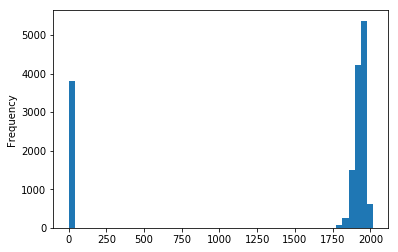

In [65]:
import matplotlib.pylab as plt
%matplotlib inline
artists.BeginDate.plot('hist', bins = 50)

## How is missing data represented?

<img src="./img/artist_zero_is_missing.png" width=400>

We will fix this soon!

## Data Cleaning Step 3 - Dealing with a text column

#### Necessary steps

* Inspect a list of unique labels and their counts
    * Look at the most common and fix common errors
    * Look at the least common, odd cases hide here
* Plot the frequency distribution.  Anything unusual?
* How are missing data represented?  Is it consistent?
    * Switch to `np.NaN` (Pandas), `None` (pure Python), `null` (Spark SQL)
* Look for and fix similarities in the labels
    * i.e. "Todd" vs. "todd"

#### Optional steps

* Consider switching to lowercase
* Consider adding a `"Other"` category for rare labels
* Consider recoding into broader categories

## Inspecting text columns

* Stats: `value_counts()`
* Number of labels: `value_counts().shape

In [31]:
artists.Nationality.value_counts().shape # Number of unique labels

(130,)

In [32]:
artists.Nationality.value_counts()

American               5454
German                  976
French                  898
British                 872
Italian                 554
Japanese                509
Swiss                   294
Dutch                   270
Russian                 259
Austrian                248
Nationality unknown     209
Canadian                207
Brazilian               177
Spanish                 158
Argentine               151
Mexican                 135
Polish                  135
Swedish                 134
Danish                  121
Chinese                  97
Belgian                  95
Czech                    85
Israeli                  79
Chilean                  74
Cuban                    70
South African            70
Australian               65
Finnish                  63
Hungarian                55
Venezuelan               52
                       ... 
Paraguayan                2
Congolese                 2
Native American           1
Cypriot                   1
Kuwaiti             

## Inspecting text columns

* Plot: `value_counts().plot('bar')`

**Question:** Do you see any problems?

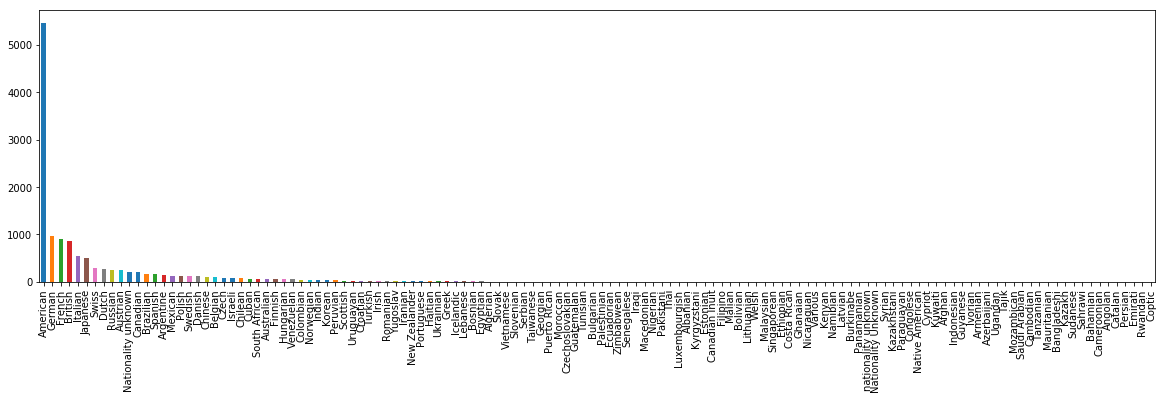

In [33]:
plt.figure(figsize=(20,5))
artists.Nationality.value_counts().plot('bar')

## Be a Data Detective

<img src="./img/nationality_unknown.png" width=400>

## Using `head` to inspect the most common labels

Note that

* `value_counts` are sorted in descending order
* we can add `head` to the chain to 

In [34]:
artists.Nationality.value_counts().head(10)

American    5454
German       976
French       898
British      872
Italian      554
Japanese     509
Swiss        294
Dutch        270
Russian      259
Austrian     248
Name: Nationality, dtype: int64

## Using `head` with `plot`

Note that

* `value_counts` are sorted in descending order
* we can add `head` to the chain to 

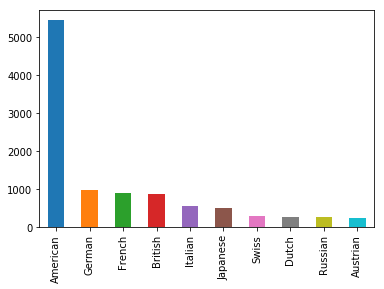

In [79]:
artists.Nationality.value_counts().head(10).plot('bar')

## <font color="red"> Exercise 5 </font>
    
**Task:** Inspect the statistics and plots for `artwork`.  Be sure to look at one variable of each type.

In [80]:
artwork.Artist.value_counts().size

14278

In [82]:
artwork.Artist.value_counts().head(10)

Eugène Atget                5050
Louise Bourgeois            3336
Ludwig Mies van der Rohe    2637
Unknown photographer        2175
Jean Dubuffet               1436
Lee Friedlander             1317
Pablo Picasso               1309
Marc Chagall                1162
Henri Matisse               1063
Pierre Bonnard               894
Name: Artist, dtype: int64

In [81]:
artwork.Artist.value_counts()

Eugène Atget                                                                                                                 5050
Louise Bourgeois                                                                                                             3336
Ludwig Mies van der Rohe                                                                                                     2637
Unknown photographer                                                                                                         2175
Jean Dubuffet                                                                                                                1436
Lee Friedlander                                                                                                              1317
Pablo Picasso                                                                                                                1309
Marc Chagall                                                                              

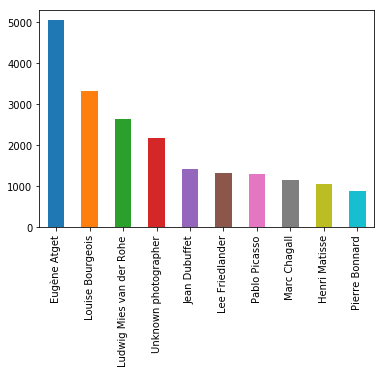

In [83]:
artwork.Artist.value_counts().head(10).plot('bar')

In [84]:
artwork.columns

Index(['Title', 'Artist', 'ConstituentID', 'ArtistBio', 'Nationality',
       'BeginDate', 'EndDate', 'Gender', 'Date', 'Medium', 'Dimensions',
       'CreditLine', 'AccessionNumber', 'Classification', 'Department',
       'DateAcquired', 'Cataloged', 'ObjectID', 'URL', 'ThumbnailURL',
       'Circumference_cm', 'Depth_cm', 'Diameter_cm', 'Height_cm', 'Length_cm',
       'Weight_kg', 'Width_cm', 'Seat_Height_cm', 'Duration_sec'],
      dtype='object')

In [85]:
artwork.Height_cm.describe()

count    117187.000000
mean         37.642548
std          47.700061
min           0.000000
25%          18.100000
50%          27.940056
75%          44.300000
max        9140.000000
Name: Height_cm, dtype: float64

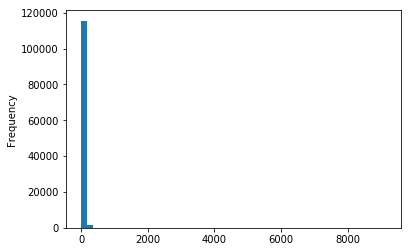

In [47]:
artwork.Height_cm.plot('hist', bins=50)

## Data Cleaning Step 4 - Dealing with a date column

#### Necessary steps

* Is the formating consistent?
* Correct conversion?
    * Two digit year?  How is this converted?
* Make columns for various date-parts
    * year
    * month
    * day
    * etc.
* Make plots of the date-parts and look for unusual values

## Data Cleaning Step 5 - Inspect relationship between columns

#### Necessary steps

* Compute cross-tabulated summary methods
    * **Text + Numeric** Group-by mean/median/SD/IQR
    * **Text + Text** Group-by counts/percents
* Plot the relationship
    * **Text + Numeric** side-by-side box plot
    * **Text + Text** mosiac plot
    * **Numeric + Numeric** scatter plot
* Look for unusual values.
    * i.e. `0` as missing often shows up in scatterplots

# Preview of Coming Attractions

## R and Python can interact!

In [66]:
#!pip install rpy2 tzlocal
import rpy2
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [67]:
import warnings
warnings.filterwarnings('ignore')

In [68]:
%%R
rnorm(5, 2, 3)

[1] -1.787447  4.034125  1.743742  1.597456  4.410406


## We love dplyr!

In [69]:
%%R -i artists -o output
library(dplyr)

(artists %>%
select(BeginDate, DisplayName, Nationality) %>%
filter(BeginDate > 0) %>%
head) -> output
output

  BeginDate     DisplayName Nationality
1      1930  Robert Arneson    American
2      1936  Doroteo Arnaiz     Spanish
3      1941     Bill Arnold    American
4      1946 Charles Arnoldi    American
5      1941     Per Arnoldi      Danish
6      1925   Danilo Aroldi     Italian


## Wait ... did you just run R dplyr code in a jupyter notebook?
<img src='./img/r_magic_1.png' width=400>

#### Yep

## Wait ... did you just pass a `Pandas` dataframe to `dplyr`

<img src='./img/r_magic_2.png' width=400>

#### Yes ... yes I did.

## Wait ... OMG ... did you just pass the result BACK TO PYTHON!!1!one! 

<img src='./img/r_magic_3.png' width=400>

#### Ummm hmmmm

In [70]:
output

,BeginDate,DisplayName,Nationality
0,1930,Robert Arneson,American
1,1936,Doroteo Arnaiz,Spanish
2,1941,Bill Arnold,American
3,1946,Charles Arnoldi,American
4,1941,Per Arnoldi,Danish
5,1925,Danilo Aroldi,Italian


## HOLD ON! ... isn't that CHEATING!

#### ... maybe your right ...